## Chapter 13: Multi-layer Perceptrons 

# 13.0 Introduction

As we first saw in Section 11.1 single layer neural network units - unlike polynomials and other fixed kernels - have internal parameters that allow each element to take on a variety of shapes.  In this Chapter we expand on that introduction extensively, disussing multi-layer neural networks - often also referred to *multi-layer perceptrons*, *feedforward neural networks*, or *fully connected networks*.  

In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import basics_library 

# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos_multiple_panels
classif_plotter = nonlib.nonlinear_classification_visualizer_multiple_panels
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner
classif_plotter_crossval = nonlib.crossval_classification_visualizer
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 
import copy
import math

# this sis needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

#### <span style="color:#a50e3e;">Example. </span> fixed vs parameterized feature transform

In [102]:
# load in dataset
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

In [124]:
num_pts = 30
x = np.linspace(0,1 + 3*np.pi,num_pts)[np.newaxis,:]
y = np.sin(0.8*x + 1.5)

In [125]:
# This code cell will not be shown in the HTML version of this notebook
degree = 15

# initialize with input/output data
mylib5 = nonlib.reg_lib.super_setup.Setup(x,y)

# perform preprocessing step(s) - especially input normalization
mylib5.preprocessing_steps(normalizer_name = 'none')

# set train portion
mylib5.make_train_val_split(train_portion=1)

# choose cost
mylib5.choose_cost(name = 'least_squares')

# choose dimensions of fully connected multilayer perceptron layers
mylib5.choose_features(feature_name = 'fourier',degree = degree)

# fit an optimization
mylib5.fit(algo = 'newtons_method',max_its = 1,verbose = False,lam = 10**(-8))

In [126]:
mylib5.train_cost_histories[0]

[array([ 0.56581176]), array([ 0.08183759])]

<IPython.core.display.Javascript object>


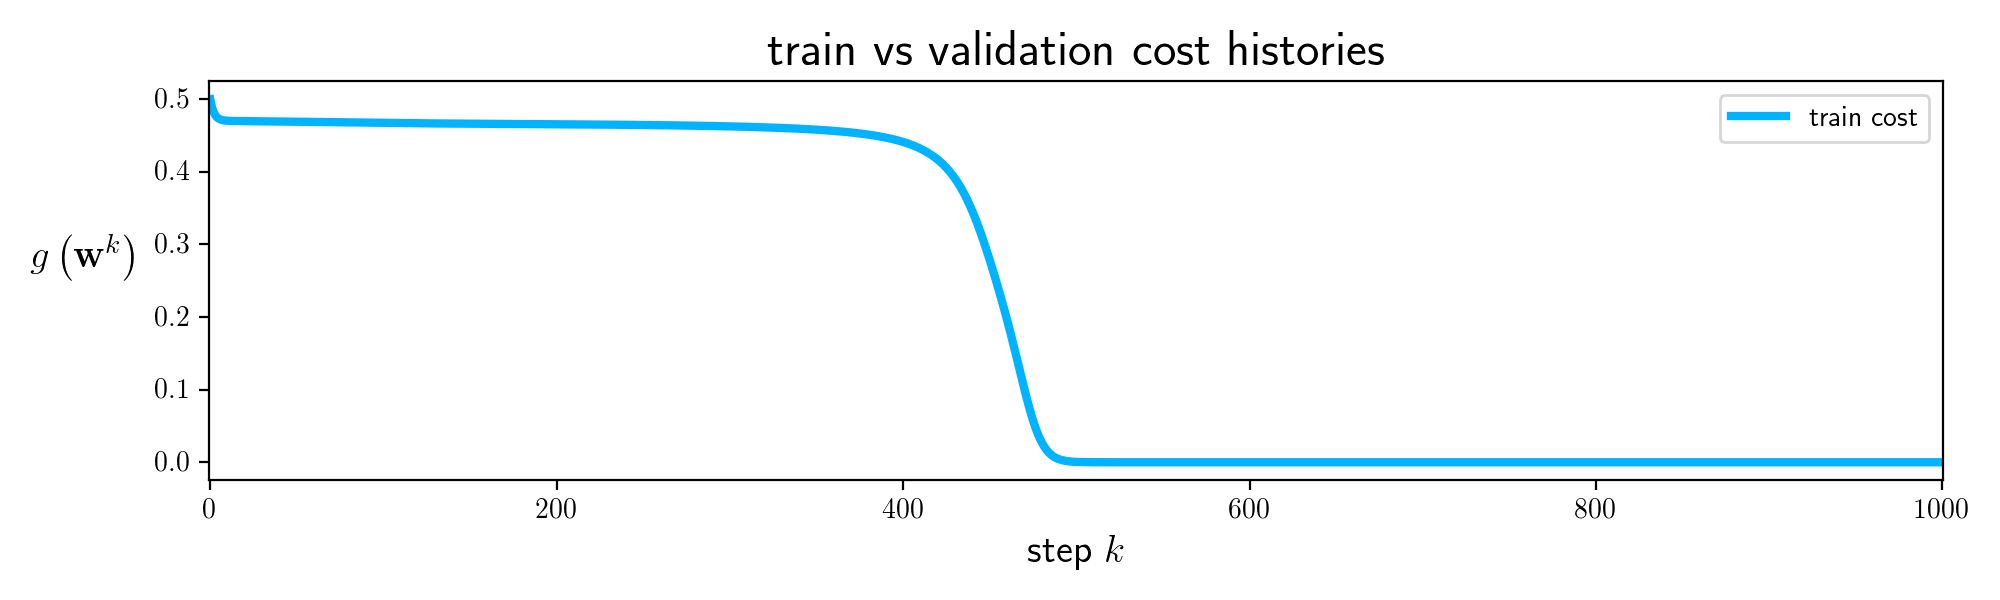

In [129]:
# This code cell will not be shown in the HTML version of this notebook
# initialize with input/output data
mylib6 = nonlib.reg_lib.super_setup.Setup(x,y)

# perform preprocessing step(s) - especially input normalization
mylib6.preprocessing_steps(normalizer_name = 'standard')

# set train portion
mylib6.make_train_val_split(train_portion=1)

# choose cost
mylib6.choose_cost(name = 'least_squares')

# choose dimensions of fully connected multilayer perceptron layers
layer_sizes = [1]
mylib6.choose_features(feature_name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'sin',scale = 0.1)

# fit an optimization
mylib6.fit(algo = 'gradient_descent',alpha = 10**(0),max_its = 1000,verbose = False)
mylib6.show_histories(start = 0)

<IPython.core.display.Javascript object>


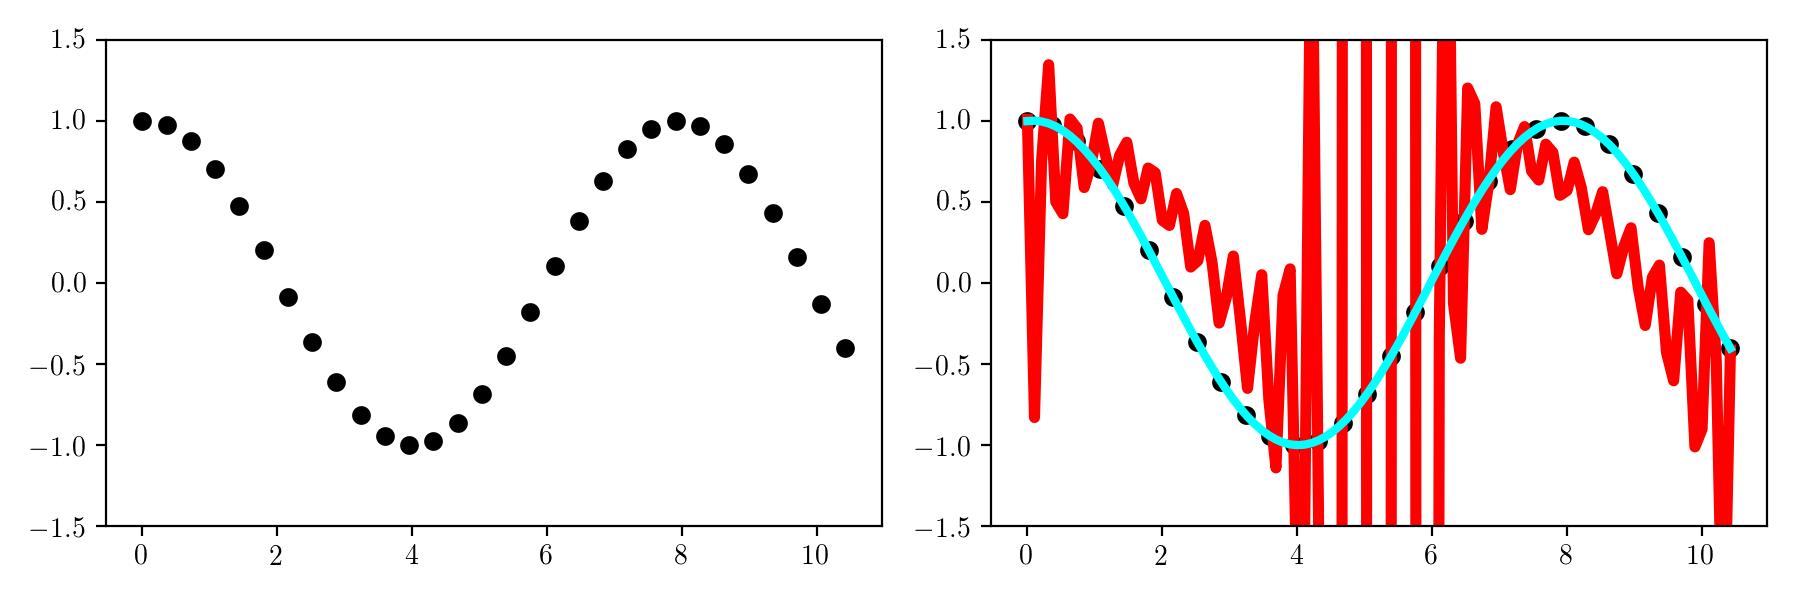

In [130]:
import matplotlib.pyplot as plt
import copy
fig = plt.figure(figsize = (9,3))
ax0 = plt.subplot(1,2,1)
ax0.scatter(x,y,c='k',edgecolor = 'w',linewidth = 1,s=60)
ax = plt.subplot(1,2,2)
ax.scatter(x,y,c='k',edgecolor = 'w',linewidth = 1,s=60)

# plot cosine model
s = np.linspace(0,1+3*np.pi,100)[np.newaxis,:]
w = mylib5.weight_histories[0][-1]
normalizer = mylib5.normalizer
model = mylib5.model
t = model(normalizer(s),w)
ax.plot(s.flatten(),t.flatten(),c = 'r',linewidth = 4)

# plot network model
w = mylib6.weight_histories[0][-1]
normalizer = mylib6.normalizer
model = mylib6.model
t = model(normalizer(s),w)
ax.plot(s.flatten(),t.flatten(),c = 'aqua',linewidth = 3)
ymin = np.min(copy.deepcopy(y))
ymax = np.max(copy.deepcopy(y))
ygap = (ymax - ymin)*0.25
ymin -= ygap
ymax += ygap
ax.set_ylim([ymin,ymax])
ax0.set_ylim([ymin,ymax])

plt.show()